# 一 pandas读取各种文件

## 1.1 读取CSV文件

In [3]:
import pandas as pd

In [2]:
file_path = "./data/ml-latest-small/ratings.csv"

# 使用pandas.read_csv读取数据
ratings = pd.read_csv(file_path)
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
# 读取前几行
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# 查看数据的形状 返回(行数，列数)
ratings.shape

(100836, 4)

In [5]:
# 查看列名列表
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
# 查看每列的数据类型
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [7]:
# 查看索引项
ratings.index

RangeIndex(start=0, stop=100836, step=1)

## 1.2 读取txt文件，自己指定分隔符、列名

In [8]:
file_path = "./data/crazyant/access_pvuv.txt"

pvuv = pd.read_csv(
    file_path,
    sep="\t",  # 分隔符
    header=None,  # 没有标题行
    names=['pdata', 'pv', 'uv'],  # 自己指定字段名
)

In [9]:
# 查看数据
pvuv

,pdata,pv,uv
0,2019-09-10,139,92
1,2019-09-09,185,153
2,2019-09-08,123,59
3,2019-09-07,65,40
4,2019-09-06,157,98
5,2019-09-05,205,151
6,2019-09-04,196,167
7,2019-09-03,216,176
8,2019-09-02,227,148
9,2019-09-01,105,61


## 1.3 读取excel文件

In [4]:
file_path = "./data/crazyant/access_pvuv.xlsx"

In [6]:
# 读取excel文件
excel_data = pd.read_excel(file_path)
excel_data

,日期,PV,UV
0,2019-09-10,139,92
1,2019-09-09,185,153
2,2019-09-08,123,59
3,2019-09-07,65,40
4,2019-09-06,157,98
5,2019-09-05,205,151
6,2019-09-04,196,167
7,2019-09-03,216,176
8,2019-09-02,227,148
9,2019-09-01,105,61


## 1.4 读取MySQL数据表

In [12]:
import pymysql

conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="******",
    database="poems",
    charset="utf8",
)

In [13]:
# 老式写法 这里可能会报错
mysql_page = pd.read_sql("select * from website_famous", 
                         con=conn)

C:\Users\20866\AppData\Local\Temp\ipykernel_17520\3169850134.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mysql_page = pd.read_sql("select * from website_famous",


In [14]:
mysql_page

,id,sentence,title
0,1,庖有肥肉，厩有肥马，民有饥色，野有饿莩，此率兽而食人也。,《孟子·梁惠王章句上·第四节》
1,2,华表月明归夜鹤，叹当时、花竹今如此。,吴文英《金缕歌·陪履斋先生沧浪看梅》
2,3,醉里乾坤大，壶中日月长,《水浒传·第二十九回》
3,4,火烧眉毛，且顾眼前,《镜花缘·第三十五回》
4,5,小雨空帘，无人深巷，已早杏花先卖。,史达祖《夜行船·正月十八日闻卖杏花有感》
...,...,...,...
195,196,进退盈缩，与时变化，圣人之常道也。,《史记·七十列传·范雎蔡泽列传》
196,197,声乐之入人也深，其化人也速,《荀子·乐论》
197,198,荷花娇欲语，愁杀荡舟人。,李白《渌水曲》
198,199,只因一着错，满盘俱是空。,《醒世恒言·卷八》


In [1]:
# 这里是新写法
from sqlalchemy import create_engine
import pandas as pd

MYSQL_HOST = 'localhost'
MYSQL_PORT = '3306'
MYSQL_USER = 'root'
MYSQL_PASSWORD = '******'
MYSQL_DB = 'poems'

engine = create_engine('mysql+pymysql://%s:%s@%s:%s/%s?charset=utf8'
                           % (MYSQL_USER, MYSQL_PASSWORD, MYSQL_HOST, MYSQL_PORT, MYSQL_DB))

sql = "select * from website_famous"

df = pd.read_sql(sql, engine)
df

,id,sentence,title
0,1,庖有肥肉，厩有肥马，民有饥色，野有饿莩，此率兽而食人也。,《孟子·梁惠王章句上·第四节》
1,2,华表月明归夜鹤，叹当时、花竹今如此。,吴文英《金缕歌·陪履斋先生沧浪看梅》
2,3,醉里乾坤大，壶中日月长,《水浒传·第二十九回》
3,4,火烧眉毛，且顾眼前,《镜花缘·第三十五回》
4,5,小雨空帘，无人深巷，已早杏花先卖。,史达祖《夜行船·正月十八日闻卖杏花有感》
...,...,...,...
195,196,进退盈缩，与时变化，圣人之常道也。,《史记·七十列传·范雎蔡泽列传》
196,197,声乐之入人也深，其化人也速,《荀子·乐论》
197,198,荷花娇欲语，愁杀荡舟人。,李白《渌水曲》
198,199,只因一着错，满盘俱是空。,《醒世恒言·卷八》


# 二 pandas数据结构
1. Series
2. DataFrame
3. 从DataFrame中查询出Series

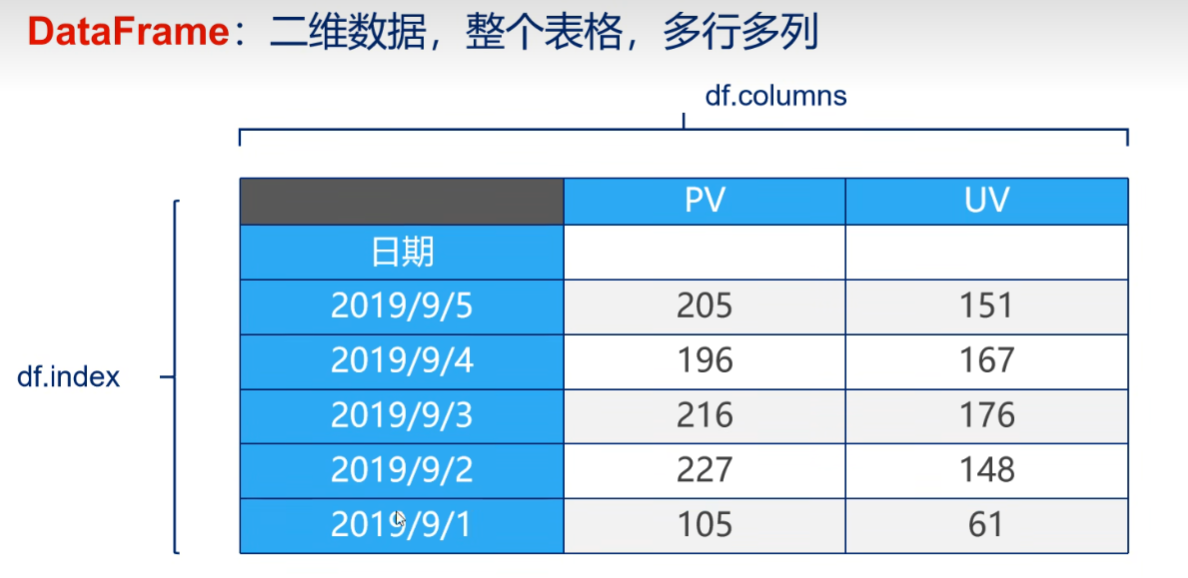

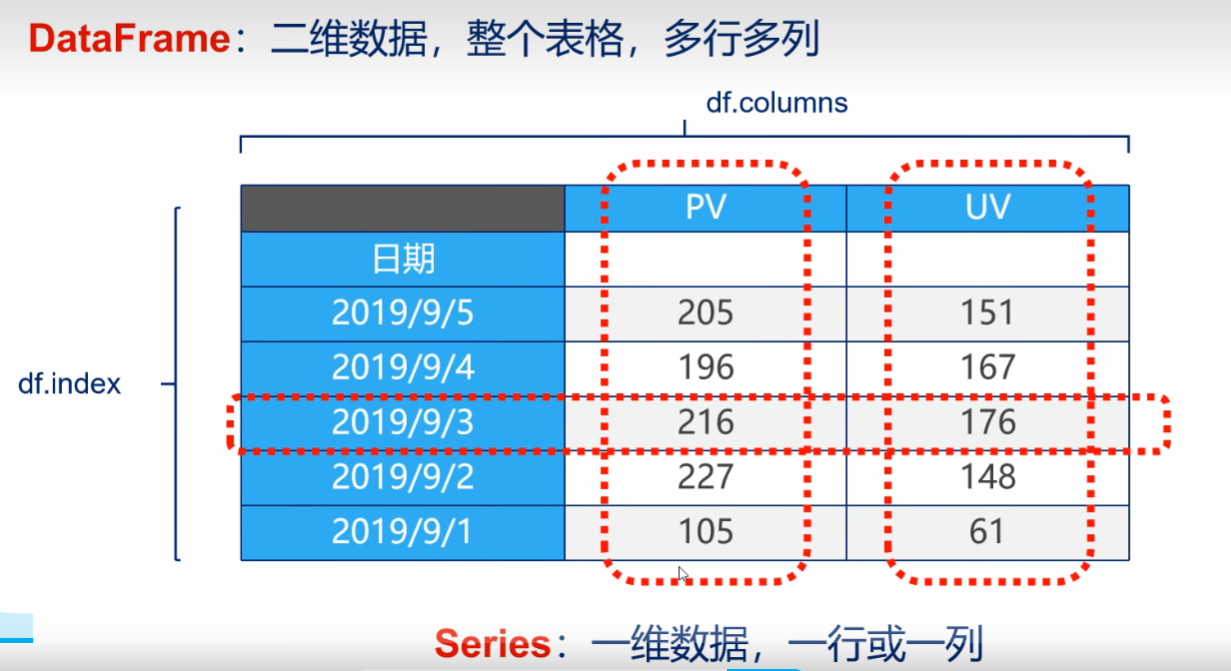

In [4]:
import pandas as pd
import numpy as np

## 2.1 Series
Series是一种类似于一维数组的对象，它由一组数据（不同的数据类型）以及一组与之相关的数据标签（即索引）组成

### 2.1.1 仅有数据列表即可产生最简单的Series

In [5]:
s1 = pd.Series([1, 'a', 5.2, 7])

In [6]:
# 左侧为索引 右侧为数据
s1

0      1
1      a
2    5.2
3      7
dtype: object

In [7]:
# 获取索引
s1.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
# 获取数据
s1.values

array([1, 'a', 5.2, 7], dtype=object)

### 2.1.2 创建一个具有标签索引的Series 

In [9]:
s2 = pd.Series([1, 'a', 5.2, 7], index=['a', 'b', 'c', 'd'])

In [10]:
s2

a      1
b      a
c    5.2
d      7
dtype: object

### 2.1.3 使用Python字典创建Series

In [12]:
s_data = {
    "Ohio": 35000,
    "Texas": 72000,
    "Oregon": 16000,
    "Utah": 5000,
}

In [13]:
s3 = pd.Series(s_data)

In [14]:
s3

Ohio      35000
Texas     72000
Oregon    16000
Utah       5000
dtype: int64

### 2.1.4 根据标签索引查询数据

In [15]:
s2

a      1
b      a
c    5.2
d      7
dtype: object

In [16]:
s2['a']

1

In [17]:
s2["b"]

'a'

In [18]:
type(s2['a'])

int

In [19]:
s2[["b", "a"]]

b    a
a    1
dtype: object

In [20]:
type(s2[["b", "a"]])

pandas.core.series.Series

## 2.2 DataFrame
DataFrame是个表格型的数据结构
- 每列可以是不同的类型值
- 既有行索引index，又有列索引columns
- 可以被看做由Series组成的字典

创建DataFrame最常用的方法，即为上节讲到的从excel，mysql， csv和txt中获取数据

### 2.2.1 根据多个字典创建DataFrame

In [21]:
data = {
    "state": ["Ohio", "computer", "science", "Nevada", "python"],
    'year': ["2000", "2001", "2001", "2019", "2024"],
    "pop": [1.5, 1.7, 2.6, 3.2, 0.5],
}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,computer,2001,1.7
2,science,2001,2.6
3,Nevada,2019,3.2
4,python,2024,0.5


In [23]:
df.dtypes

state     object
year      object
pop      float64
dtype: object

In [24]:
df.columns

Index(['state', 'year', 'pop'], dtype='object')

In [25]:
df.index

RangeIndex(start=0, stop=5, step=1)

## 2.3 从DataFrame中查询出Series

- 如果只查询一行或者一列，返回的是Series对象的数据
- 如果查询多行或者多列，返回的是DataFrame对象

In [26]:
df

,state,year,pop
0,Ohio,2000,1.5
1,computer,2001,1.7
2,science,2001,2.6
3,Nevada,2019,3.2
4,python,2024,0.5


### 2.3.1 查询一列，结果是一个Series

In [27]:
df["year"]

0    2000
1    2001
2    2001
3    2019
4    2024
Name: year, dtype: object

In [28]:
type(df["year"])

pandas.core.series.Series

### 2.3.2 查询多列，结果是一个DataFrame

In [29]:
df

,state,year,pop
0,Ohio,2000,1.5
1,computer,2001,1.7
2,science,2001,2.6
3,Nevada,2019,3.2
4,python,2024,0.5


In [30]:
df[["year", "pop"]]

,year,pop
0,2000,1.5
1,2001,1.7
2,2001,2.6
3,2019,3.2
4,2024,0.5


In [31]:
type(df[["year", "pop"]])

pandas.core.frame.DataFrame

### 2.3.3 查询一行，结果是Series

In [32]:
df

,state,year,pop
0,Ohio,2000,1.5
1,computer,2001,1.7
2,science,2001,2.6
3,Nevada,2019,3.2
4,python,2024,0.5


In [33]:
df.loc[1]

state    computer
year         2001
pop           1.7
Name: 1, dtype: object

In [34]:
type(df.loc[1])

pandas.core.series.Series

### 2.3.4 查询多行，返回的是一个DataFrame

In [35]:
df

,state,year,pop
0,Ohio,2000,1.5
1,computer,2001,1.7
2,science,2001,2.6
3,Nevada,2019,3.2
4,python,2024,0.5


In [38]:
df.loc[0:3]

,state,year,pop
0,Ohio,2000,1.5
1,computer,2001,1.7
2,science,2001,2.6
3,Nevada,2019,3.2


In [37]:
type(df.loc[1:3])

pandas.core.frame.DataFrame

# 三 pandas数据查询
1. df.loc方法 根据行、列的标签值查询
2. df.iloc方法 根据行、列的数字位置查询
3. df.where方法
4. df.query方法

df.loc方法 既能查询又能覆盖写入，强烈推荐

pandas使用df.loc查询数据的方法

1. 使用单个label值查询数据
2. 使用值列表批量查询
3. 使用数值区间进行范围查询
4. 使用条件表达式查询
5. 使用函数查询

注意：
- 以上查询方法既适用于行也适用于列
- 注意观察姜维DataFrame->Series

读取数据

In [27]:
import pandas as pd

df = pd.read_csv("./data/beijing_tianqi/beijing_tianqi_2018.csv")

In [28]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


In [29]:
# 设置索引为日期

# 第一个参数表示我们要将哪一列设为index 第二个参数代表将原本df改变 
# 如果为False那么不会改变原来的df而是会返回一个新的df
df.set_index('ymd', inplace=True)  

df

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1
...,...,...,...,...,...,...,...,...
2018-12-27,-5℃,-12℃,多云~晴,西北风,3级,48,优,1
2018-12-28,-3℃,-11℃,晴,西北风,3级,40,优,1
2018-12-29,-3℃,-12℃,晴,西北风,2级,29,优,1


In [30]:
df.index

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='ymd', length=365)

In [31]:
# 替换温度后面的后缀 ℃

# df.loc[:, 'bWendu'] 逗号前面：筛选出所有行 逗号后面那个参数：筛选出所有列 将其后缀去掉并转换成int类型
df.loc[:, 'bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')
df.loc[:, 'yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')
df.dtypes

bWendu       object
yWendu       object
tianqi       object
fengxiang    object
fengli       object
aqi           int64
aqiInfo      object
aqiLevel      int64
dtype: object

In [32]:
df

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2,-5,多云,北风,1-2级,28,优,1
2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1
...,...,...,...,...,...,...,...,...
2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1
2018-12-28,-3,-11,晴,西北风,3级,40,优,1
2018-12-29,-3,-12,晴,西北风,2级,29,优,1


## 3.1 使用单个label值查询数据
行或者列，都可以传入单个值，实现精确匹配

In [36]:
# 得到单个值
df.loc['2018-01-02', 'yWendu']

-5

In [37]:
type(df.loc['2018-01-02', 'yWendu'])

int

In [38]:
# 得到一个Series
df.loc['2018-01-02', ['bWendu', 'yWendu']]

bWendu     2
yWendu    -5
Name: 2018-01-02, dtype: object

In [39]:
type(df.loc['2018-01-02', ['bWendu', 'yWendu']])

pandas.core.series.Series

## 3.2 使用值列表批量查询

In [41]:
# 得到Series
df.loc[['2018-01-02', '2018-01-03', '2018-01-04'], ['bWendu']]

,bWendu
ymd,
2018-01-02,2
2018-01-03,2
2018-01-04,0


In [42]:
type(df.loc[['2018-01-02', '2018-01-03', '2018-01-04'], ['bWendu']])

pandas.core.frame.DataFrame

In [43]:
# 得到DataFrame
df.loc[['2018-01-02', '2018-01-03', '2018-01-04'], ['bWendu', 'yWendu']]

,bWendu,yWendu
ymd,,
2018-01-02,2,-5
2018-01-03,2,-5
2018-01-04,0,-8


In [44]:
type(df.loc[['2018-01-02', '2018-01-03', '2018-01-04'], ['bWendu', 'yWendu']])

pandas.core.frame.DataFrame

## 3.3 使用数值区间进行范围查找
注意：区间既包括开始，也包括结束

In [45]:
 # 行index按区间
df.loc["2018-01-02":"2018-01-05", "bWendu"]

ymd
2018-01-02    2
2018-01-03    2
2018-01-04    0
2018-01-05    3
Name: bWendu, dtype: object

In [46]:
type(df.loc["2018-01-02":"2018-01-05", "bWendu"])

pandas.core.series.Series

In [47]:
# 列index按区间
df.loc["2018-01-02", "bWendu":"fengli"]

bWendu          2
yWendu         -5
tianqi       阴~多云
fengxiang     东北风
fengli       1-2级
Name: 2018-01-02, dtype: object

In [48]:
type(df.loc["2018-01-02", "bWendu":"fengli"])

pandas.core.series.Series

In [49]:
# 行、列都按区间查询
df.loc["2018-01-02":"2018-01-05", "bWendu": "fengli"]

,bWendu,yWendu,tianqi,fengxiang,fengli
ymd,,,,,
2018-01-02,2,-5,阴~多云,东北风,1-2级
2018-01-03,2,-5,多云,北风,1-2级
2018-01-04,0,-8,阴,东北风,1-2级
2018-01-05,3,-6,多云~晴,西北风,1-2级


In [50]:
type(df.loc["2018-01-02":"2018-01-05", "bWendu": "fengli"])

pandas.core.frame.DataFrame

## 3.4 使用条件表达式查询
bool列表的长度得等于行数或者列数

In [51]:
# 简单条件查询 最低温度低于-10度的列表
df.loc[df['yWendu']<-10, :]

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2018-01-23,-4,-12,晴,西北风,3-4级,31,优,1
2018-01-24,-4,-11,晴,西南风,1-2级,34,优,1
2018-01-25,-3,-11,多云,东北风,1-2级,27,优,1
2018-12-26,-2,-11,晴~多云,东北风,2级,26,优,1
2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1
2018-12-28,-3,-11,晴,西北风,3级,40,优,1
2018-12-29,-3,-12,晴,西北风,2级,29,优,1
2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1


In [52]:
# 注意观察这个bool列表
df['yWendu']<-10

ymd
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2018-12-27     True
2018-12-28     True
2018-12-29     True
2018-12-30     True
2018-12-31    False
Name: yWendu, Length: 365, dtype: bool

In [53]:
# 复杂条件查询
df.loc[(df["bWendu"]<30)&(df["yWendu"]>15)&(df['tianqi']=="晴")&(df['aqiLevel']==1), :]

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2018-09-07,27,16,晴,西北风,3-4级,22,优,1


In [54]:
(df["bWendu"]<30)&(df["yWendu"]>15)&(df['tianqi']=="晴")&(df['aqiLevel']==1)

ymd
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2018-12-27    False
2018-12-28    False
2018-12-29    False
2018-12-30    False
2018-12-31    False
Length: 365, dtype: bool

In [55]:
type(df.loc[(df["bWendu"]<30)&(df["yWendu"]>15)&(df['tianqi']=="晴")&(df['aqiLevel']==1), :])

pandas.core.frame.DataFrame

## 3.5 调用函数查询

In [57]:
# 直接写lambda表达式
df.loc[
    lambda df: (df['bWendu']<=30) & (df['yWendu']>=15), 
    :
]

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2018-04-28,27,17,晴,西南风,3-4级,125,轻度污染,3
2018-04-29,30,16,多云,南风,3-4级,193,中度污染,4
2018-05-04,27,16,晴~多云,西南风,1-2级,86,良,2
2018-05-09,29,17,晴~多云,西南风,3-4级,79,良,2
2018-05-10,26,18,多云,南风,3-4级,118,轻度污染,3
...,...,...,...,...,...,...,...,...
2018-09-15,26,15,多云,北风,3-4级,42,优,1
2018-09-17,27,17,多云~阴,北风,1-2级,37,优,1
2018-09-18,25,17,阴~多云,西南风,1-2级,50,优,1


In [59]:
# 自定义函数

def query_data(df):
    return df.index.str.startswith("2018-09") & (df["aqiLevel"] == 1)
df.loc[query_data, :]


,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2018-09-01,27,19,阴~小雨,南风,1-2级,50,优,1
2018-09-04,31,18,晴,西南风,3-4级,24,优,1
2018-09-05,31,19,晴~多云,西南风,3-4级,34,优,1
2018-09-06,27,18,多云~晴,西北风,4-5级,37,优,1
2018-09-07,27,16,晴,西北风,3-4级,22,优,1
2018-09-08,27,15,多云~晴,北风,1-2级,28,优,1
2018-09-15,26,15,多云,北风,3-4级,42,优,1
2018-09-16,25,14,多云~晴,北风,1-2级,29,优,1
2018-09-17,27,17,多云~阴,北风,1-2级,37,优,1
